# Цель проекта.
+ Выполнить предобработку данных и изучить их, найти интересные особенности и зависимости, которые существуют на рынке недвижимости города Санкт-Петербурга и соседних населеных пунктов.
+ Попытаться понять из каких параметров складывается цена продажи.
+ Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.
+ Понять как стоимость объектов в городе зависит от расстояния до центра города Санкт-Петербурга

# 1. Откройте файл с данными и изучите общую информацию.

In [1]:
import pandas as pd

In [2]:
try:
    df = pd.read_csv('/real_estate_data.csv', delimiter='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', delimiter='\t')

In [3]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
df.sample()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
18557,10,12500000.0,100.0,2016-08-17T00:00:00,3,2.75,19.0,58.0,3,NaN,...,15.5,0.0,Санкт-Петербург,NaN,13355.0,1.0,735.0,0.0,NaN,161.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
df.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

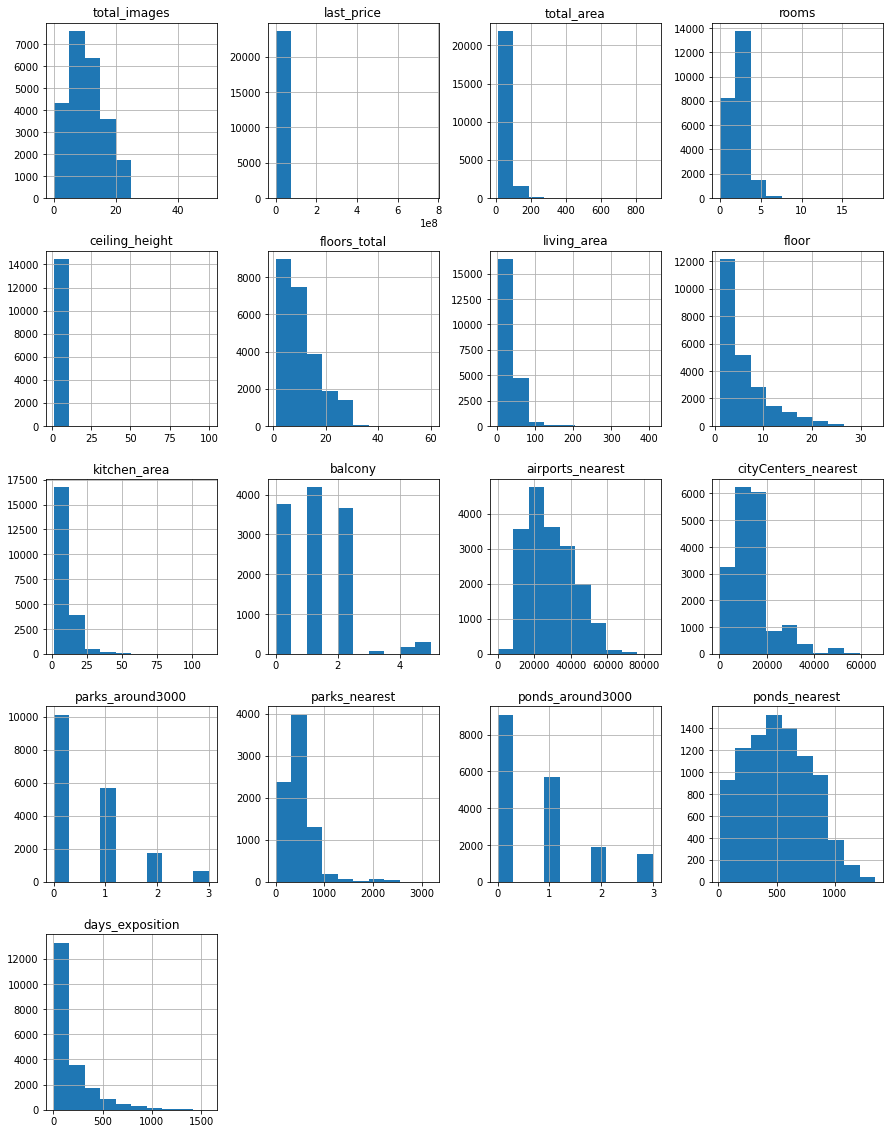

In [7]:
df.hist(figsize=(15, 20))

**Вывод:** 
*   Отсутствуют значения
*   Некорректные типы данных
*   Название столбца cityCenters_nearest выбивается из общего правила.






# 2.  Предобработка данных

In [8]:
df.duplicated().sum() # явных дубликатов нет

0

Для удобства восприятия меняю поле **last_price** на type int

In [9]:
df['last_price'] = df['last_price'].astype(int)

Так как врямя размещения объявления не указанно (только дата), меняю формат даты 

In [10]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Заменю все значения 0 в поле rooms на значение 1. Так как площадь таких квартир маленькая и большая часть из них имеют атрибут True по полю studio.

In [11]:
df['rooms'] = df['rooms'].replace(0, 1)
df['rooms'].unique()

array([ 3,  1,  2,  4,  5,  6,  7, 11,  8, 14, 10, 15,  9, 19, 16, 12])

Заменяю все значения NaN по полю **is_apartment** на **False** так как значений **True** по этому полю равно 50, то есть количество апартаментов указаных явно небольшое, а там где их пропустили, вероятность того что объекты апартаментами не являются, на мой взгляд высокая.

In [12]:
df['is_apartment'] = df['is_apartment'].fillna(False)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,NaN,11.0,18.6,1,False,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,NaN,5.0,34.3,4,False,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,NaN,14.0,NaN,9,False,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Меняю название столбца cityCenters_nearest

In [13]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})
df.columns.tolist() # Сразу проверю 

['total_images',
 'last_price',
 'total_area',
 'first_day_exposition',
 'rooms',
 'ceiling_height',
 'floors_total',
 'living_area',
 'floor',
 'is_apartment',
 'studio',
 'open_plan',
 'kitchen_area',
 'balcony',
 'locality_name',
 'airports_nearest',
 'city_centers_nearest',
 'parks_around3000',
 'parks_nearest',
 'ponds_around3000',
 'ponds_nearest',
 'days_exposition']

Разбираюсь с полем **ceiling_height**

In [14]:
df['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Слишком маленькие значения в минимальных значениях и слишком большие в максимальных

In [15]:
df[df['ceiling_height'] > 5].tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21824,20,2450000,44.0,2019-02-12,2,27.0,2.0,38.0,2,False,...,8.6,2.0,городской поселок Большая Ижора,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22309,20,5300000,45.0,2017-09-30,1,10.3,16.0,15.5,15,False,...,NaN,NaN,Санкт-Петербург,36353.0,11936.0,2.0,440.0,2.0,450.0,136.0
22336,19,9999000,92.4,2019-04-05,2,32.0,6.0,55.5,5,False,...,16.5,4.0,Санкт-Петербург,18838.0,3506.0,0.0,NaN,3.0,511.0,NaN
22869,0,15000000,25.0,2018-07-25,1,100.0,5.0,14.0,5,True,...,11.0,5.0,Санкт-Петербург,34963.0,8283.0,1.0,223.0,3.0,30.0,19.0
22938,14,4000000,98.0,2018-03-15,4,27.0,2.0,73.0,2,True,...,9.0,1.0,деревня Нижняя,NaN,NaN,NaN,NaN,NaN,NaN,27.0


Пишу функцию , которая меняет формат 27.0 или 32.0 на 2.70 или 3.20(исправляет допущенные ошибки на этапе заполнения), значения **NaN** меняет на высоту 2.65. Применяю функцию к столбцу.


In [16]:
def convert_height(val):
    if val > 10 and val < 35:
        return '{:,.2f}'.format(val/10)
    else:
        return val

df['ceiling_height'] = df['ceiling_height'].apply(convert_height).astype(float)

Отфильтрую все значения меньше 2.35 и те что больше 5.0 (потолки не могут быть больше 5 метров и меньше 2.20) и применю фильтр ко всему датафрейму.Другими словами удалю не выдерживающие критики минимальные и максимальные значения.

In [17]:
df = df[(df.ceiling_height > 2.35) & (df.ceiling_height < 5.0)]
df = df.reset_index(drop=True)

In [18]:
df['ceiling_height'].describe()

count    14466.000000
mean         2.725959
std          0.270341
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

Заменю все значения **NaN** по полю **balcony** на 0, оценю **Nan** как отсутствие балкона. И заменяю тип данных на **int** 

In [19]:
df['balcony'] = df['balcony'].fillna(0).astype(int)

Проработаю **locality_name**,  поменяю *поселок* на *посёлок*, затем создам список что я хочу удалить из названия. Удалю все эти строки из названий(избавляюсь от не явных дубликатов)

In [20]:
df['locality_name'] = df['locality_name'].replace(to_replace=r'поселок', value='посёлок', regex=True)

In [21]:
# Список строк на удаление
remove_list = ['деревня ', 'посёлок ', 'городского типа ', 'село ', 'городской ']

for string in remove_list:
    df['locality_name'] = df['locality_name'].replace(to_replace=string, value='', regex=True)


Пропущеных значений по полю **locality_name** всего 49 так как это значение не большое на нашей выборке, просто удалю все **NaN**

In [22]:
df = df.dropna(subset=['locality_name']).reset_index(drop=True)

Так как востановить этажность зданий без указания точного адреса не тривиальная и трудозатратная задача. Пропущеных значений по полю **floors_total** = 86, удалю все эти значения.

In [23]:
df = df.dropna(subset=['floors_total']).reset_index(drop=True)

# 3.  Посчитайте и добавьте в таблицу новые столбцы

Добовляю поле , цена за квадратный метр и присваиваю ему тип данных **int**(отбрасываю дробную часть и для лучшего восприятия)

In [24]:
df['price_square'] = df['last_price'] / df['total_area']
df['price_square'] = df['price_square'].astype(int)

День недели, а также  месяц и год публикации объявления.

In [25]:
df['weekday'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

Пишу функцию, которая возвращает этажи по условию (первый, последний, другие)
Добавляю в датафрейм столбец **type_floor** заполненый значениями то что вернула функция.

In [26]:
def convert_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другие'

df['type_floor'] = df.apply(convert_floor, axis=1)

In [27]:
df.tail()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,type_floor
14438,11,9470000,72.90,2016-10-13,2,2.75,25.0,40.3,7,False,...,0.0,NaN,1.0,806.0,519.0,129903,3,10,2016,другие
14439,9,4600000,62.40,2016-08-05,3,2.60,9.0,40.0,8,False,...,1.0,352.0,1.0,675.0,239.0,73717,4,8,2016,другие
14440,9,9700000,133.81,2017-03-21,3,3.70,5.0,73.3,3,False,...,1.0,796.0,3.0,381.0,NaN,72490,1,3,2017,другие
14441,13,11475000,76.75,2017-03-28,2,3.00,17.0,NaN,12,False,...,2.0,173.0,3.0,196.0,602.0,149511,1,3,2017,другие
14442,4,1350000,32.30,2017-07-21,1,2.50,5.0,12.3,1,False,...,NaN,NaN,NaN,NaN,NaN,41795,4,7,2017,первый


Расстояние до центра города в километрах (перевожу из м в км и округляю до целых значений).

In [28]:
df['distance_city_center'] = df['city_centers_nearest']/1000

In [29]:
def round_distance(val):
    if pd.isna(val):
        return val
    else:
        return round(val)

df['distance_city_center'] = df['distance_city_center'].apply(round_distance)

In [30]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square,weekday,month,year,type_floor,distance_city_center
0,20,13000000,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,482.0,2.0,755.0,NaN,120370,3,3,2019,другие,16.0
1,2,10000000,100.0,2018-06-19,2,3.03,14.0,32.0,13,False,...,112.0,1.0,48.0,121.0,100000,1,6,2018,другие,8.0
2,18,5400000,61.0,2017-02-26,3,2.50,9.0,43.6,7,False,...,NaN,0.0,NaN,289.0,88524,6,2,2017,другие,15.0
3,5,5050000,39.6,2017-11-16,1,2.67,12.0,20.3,3,False,...,310.0,2.0,553.0,137.0,127525,3,11,2017,другие,14.0
4,20,3550000,42.8,2017-07-01,2,2.56,5.0,27.0,5,False,...,294.0,3.0,298.0,366.0,82943,5,7,2017,последний,33.0


# 4. Проведите исследовательский анализ данных

count    14443.000000
mean        61.836266
std         36.804970
min         12.000000
25%         41.000000
50%         53.300000
75%         71.300000
max        900.000000
Name: total_area, dtype: float64

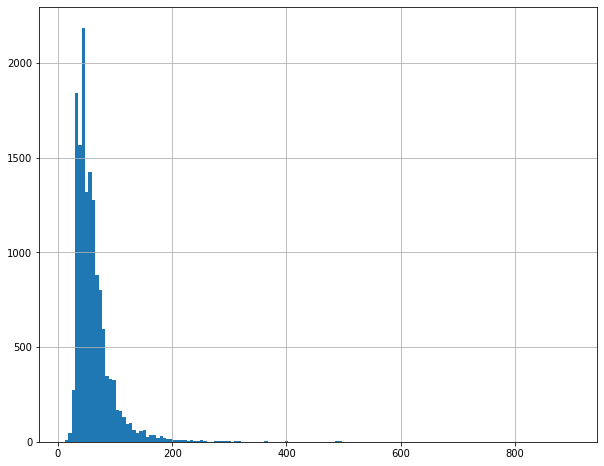

In [31]:
df['total_area'].hist(bins=150, figsize=(10,8))
df['total_area'].describe()

Распределение данных нормальное.Выбросы есть, но не критичны.Основная масса квартир выставленных на продажу имеет площадь от 40 квадратных метра до 70, а среднее значение по выборке 60.3.Добавил метод discribe чтобы иметь более детальное представление о площади квартир.

count    13655.000000
mean        35.653980
std         22.789568
min          2.000000
25%         19.200000
50%         30.800000
75%         43.300000
max        409.700000
Name: living_area, dtype: float64

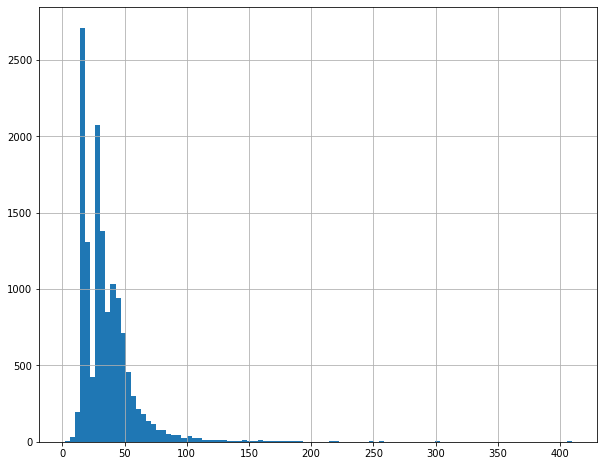

In [32]:
df['living_area'].hist(bins=100, figsize=(10,8))
df['living_area'].describe()

Жилая площадь распределение нормальное. Квартиры с жилой площадью от 18.6 до 42.3, со средним значением 34.4.Преобладают в объявлениях.Хотя есть конечно и знатные экземпляры.

count    13517.000000
mean        10.562962
std          6.034430
min          1.300000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

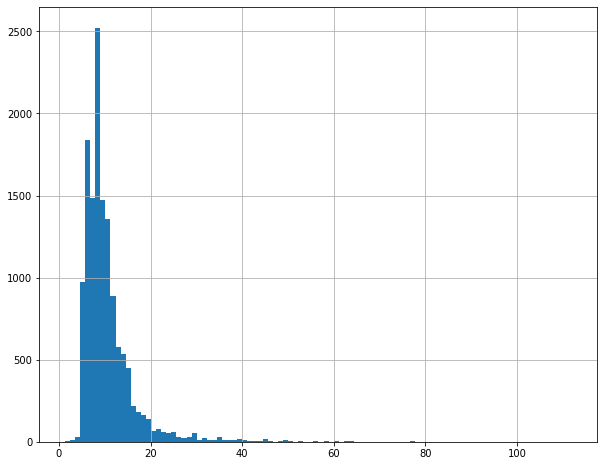

In [33]:
df['kitchen_area'].hist(bins=100, figsize=(10,8))
df['kitchen_area'].describe()

Площадь кухни. Распределение данных нормальное. Основная масса квартир с площадью кухни от 7 квадратных метров до 12. 

count    1.444300e+04
mean     6.810959e+06
std      1.005557e+07
min      1.219000e+04
25%      3.580000e+06
50%      4.850000e+06
75%      7.000000e+06
max      4.200000e+08
Name: last_price, dtype: float64

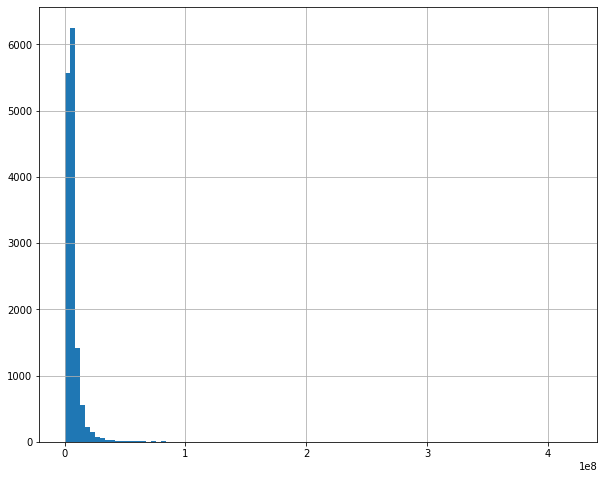

In [34]:
df['last_price'].hist(bins= 100, figsize=(10,8))
df['last_price'].describe()

<div class="alert alert-info">
    Поигрался с bins, решил что для лучшей читаемости графиков изменю их размер.

In [35]:
df['last_price'].median()

4850000.0

count    14443.000000
mean         2.142422
std          1.089730
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         16.000000
Name: rooms, dtype: float64

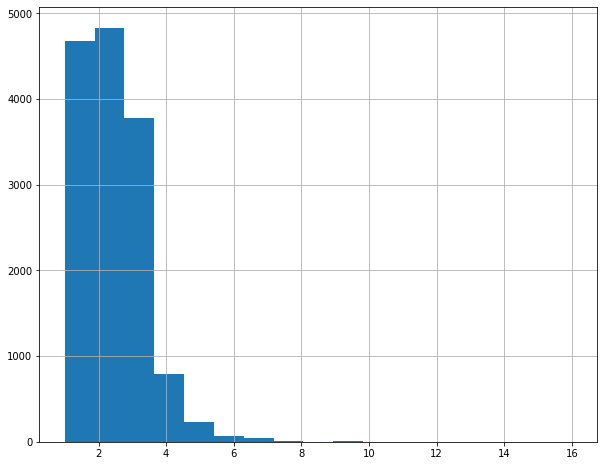

In [36]:
df['rooms'].hist(bins=17, figsize=(10,8))
df['rooms'].describe()

В основном в продаже стандартные 1, 2, 3 комнатные квартиры.Большего всего в продаже 1 комнатных(студий) потом 2 комнатных и дальше по убыванию. Максимальное число комнат тоже впечатляет их 19.

count    14443.000000
mean         2.725671
std          0.270166
min          2.400000
25%          2.520000
50%          2.650000
75%          2.800000
max          4.900000
Name: ceiling_height, dtype: float64

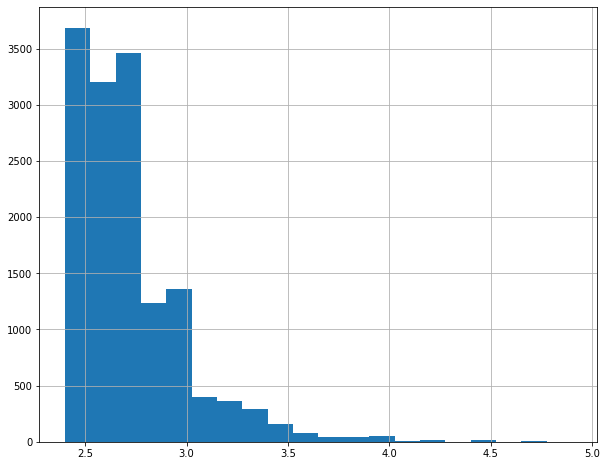

In [37]:
df['ceiling_height'].hist(bins=20, figsize=(10,8))
df['ceiling_height'].describe()

<div class="alert alert-info">
    Большого пика больше нет, поменял работу функции, оставив не заполненые значения без изменений.
    Спасибо</b>☀️</div>

Высота потолков, от минимальных 2.40 до максимальных 4.90 со средней высотой 2.69. Не думаю что медиана будет сильно отличаться.

count    14443.000000
mean         5.623485
std          4.614802
min          1.000000
25%          2.000000
50%          4.000000
75%          7.000000
max         30.000000
Name: floor, dtype: float64

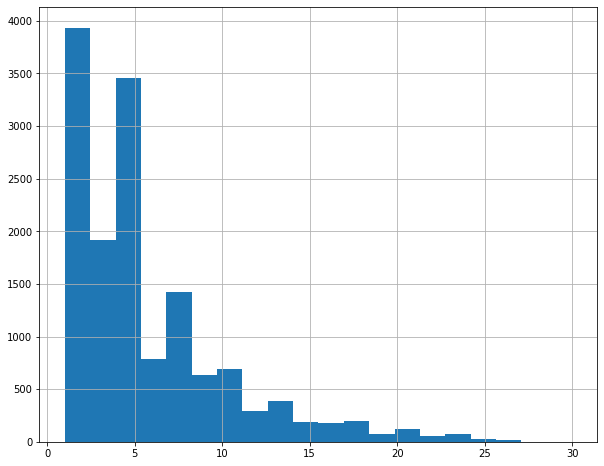

In [38]:
df['floor'].hist(bins=20, figsize=(10,8))
df['floor'].describe()

Этажность продажи квартир в Питере и окресностях , больше всего предложений до 8 этажа. Самое близкое к Богу 33 этаж. Так что welcome.

<AxesSubplot:>

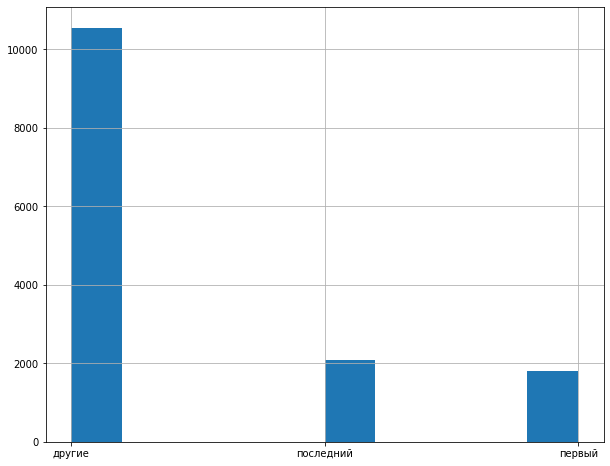

In [39]:
df['type_floor'].hist(figsize=(10,8))

In [40]:
df['type_floor'].value_counts()

другие       10555
последний     2077
первый        1811
Name: type_floor, dtype: int64

Первые и последние этажи не предлагать, так и их предложение не критическое. Больше всего предложений не включает в себя это словосочетание.

count    14443.000000
mean        10.178702
std          6.198734
min          1.000000
25%          5.000000
50%          9.000000
75%         14.000000
max         60.000000
Name: floors_total, dtype: float64

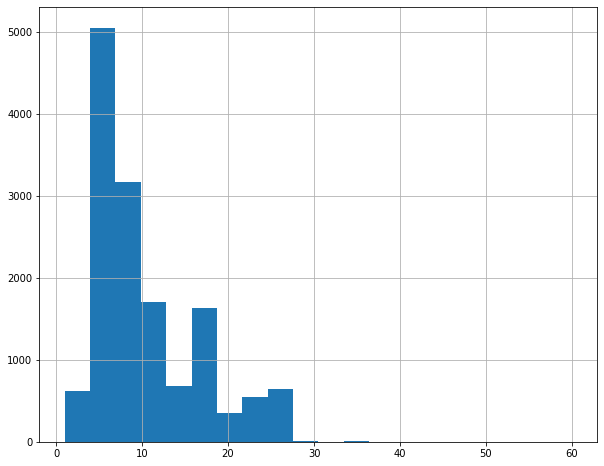

In [41]:
df['floors_total'].hist(bins=20, figsize=(10,8))
df['floors_total'].describe()

<AxesSubplot:>

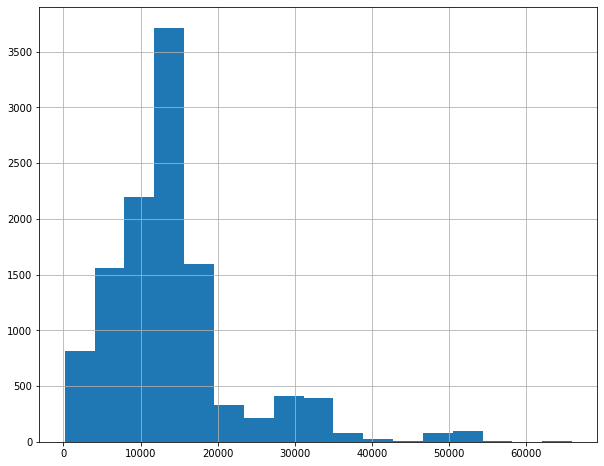

In [42]:
df['city_centers_nearest'].hist(bins=17, figsize=(10,8))

<AxesSubplot:>

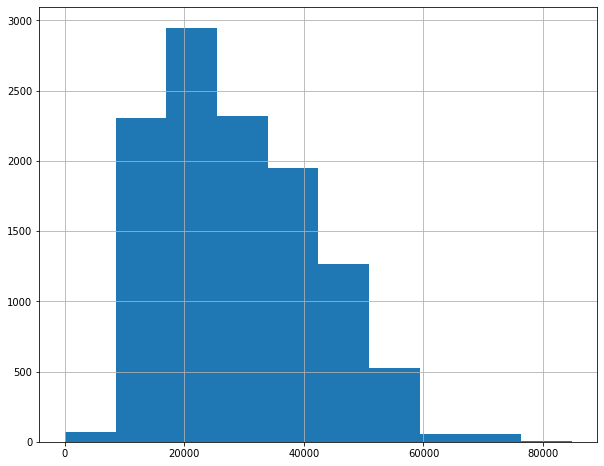

In [43]:
df['airports_nearest'].hist(figsize=(10,8))

count    5271.000000
mean      476.812559
std       320.316861
min         3.000000
25%       285.000000
50%       448.000000
75%       602.000000
max      3190.000000
Name: parks_nearest, dtype: float64

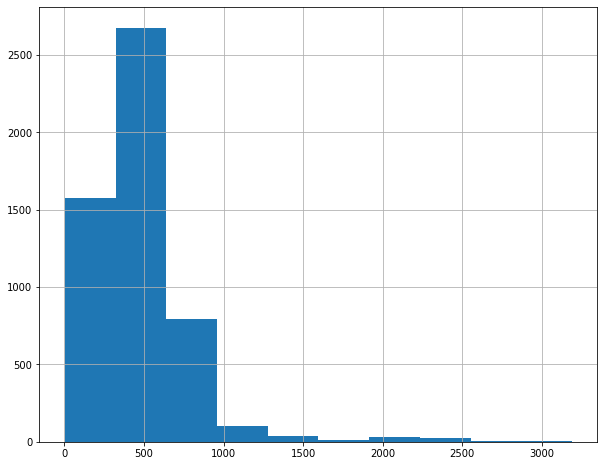

In [44]:
df['parks_nearest'].hist(figsize=(10,8))
df['parks_nearest'].describe()

Львиная доля квартир продается с парками в пешой доступности, максимально удаленый парк в 3190 метрах.Город сад.

count    11999.000000
mean       190.305109
std        228.611484
min          1.000000
25%         45.000000
50%        103.000000
75%        247.000000
max       1580.000000
Name: days_exposition, dtype: float64

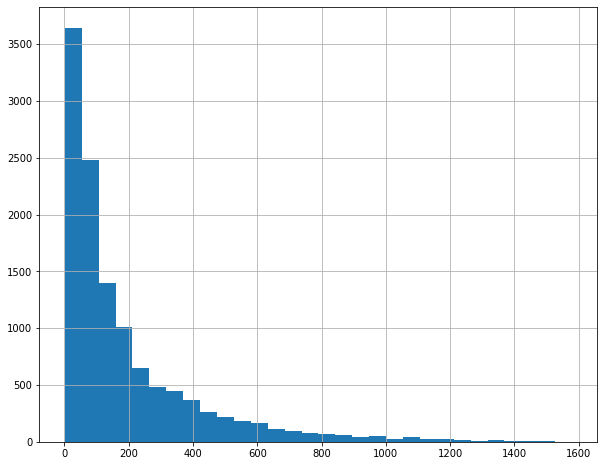

In [45]:
df['days_exposition'].hist(bins=30, figsize=(10,8))
df['days_exposition'].describe()

In [46]:
df['days_exposition'].median()

103.0

Имеем среднее 180 дней в продаже, а медиану 95 дней. Построю диаграмму ограничу по дням до Q3 = 231.(посмотреть есть ли аномалии) 

<AxesSubplot:ylabel='Frequency'>

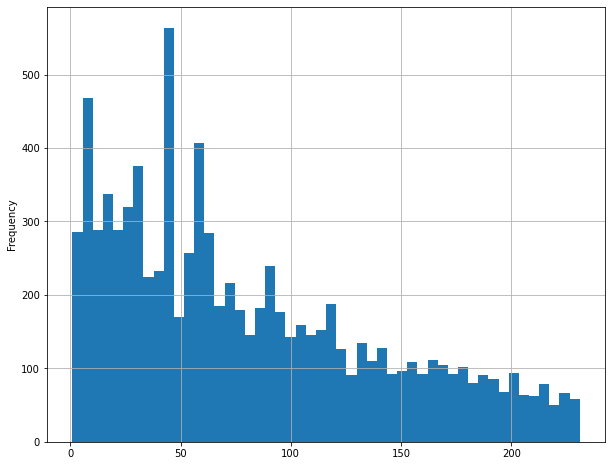

In [47]:
df['days_exposition'].plot(kind='hist', grid=True, bins=50, range=(1, 231), figsize=(10,8))

По графику видно что есть выбросы.

In [48]:
df['days_exposition'].value_counts()

45.0      392
60.0      274
7.0       155
30.0      149
90.0      103
         ... 
803.0       1
748.0       1
1022.0      1
631.0       1
1174.0      1
Name: days_exposition, Length: 1035, dtype: int64

Основные выбросы,  снятитие объявления с продажи  через 45 - 90, а также 30 - 60 дней. Возможно есть какие-то бесплатные размещения объялений(демо- режимы, льготные периоды), которые автоматически снимают объявления с продажи после прохождения определенных промежутков времени.(аномалии кратны друг другу). Не думаю что нужно удалять эти данные из датафрейма. Возможно нужно проконсультироваться с коллегами.

<AxesSubplot:>

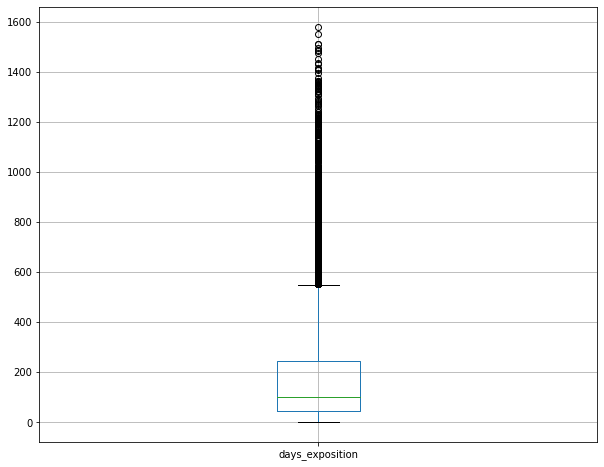

In [49]:
df.boxplot(column=['days_exposition'], figsize=(10, 8))

**Вывод:** Mетод describe нам показывает  межквартильный размах - от 45 до 231 дня, а  размах boxplot от одного до 500, с медианой 95 дней. В среднем квартира продается за 95 дней но и другие значения до 500 дней не являются сверхдолгой продажей. Квартиры которые продаются больше 500 дней это явно очень долгая продажа.

#### **Какие факторы больше всего влияют на общую (полную) стоимость объекта?**
Изучите, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

# 5. Какие факторы больше всего влияют на общую (полную) стоимость объекта?
Изучите, зависит ли цена от:
* общей площади;
* жилой площади;
* площади кухни;
* количества комнат;
* этажа, на котором расположена квартира (первый, последний, другой);
* даты размещения (день недели, месяц, год).
Постройте графики, которые покажут зависимость цены от указанных выше параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы.

**Зависит ли цена от общей площади**

<AxesSubplot:xlabel='total_area'>

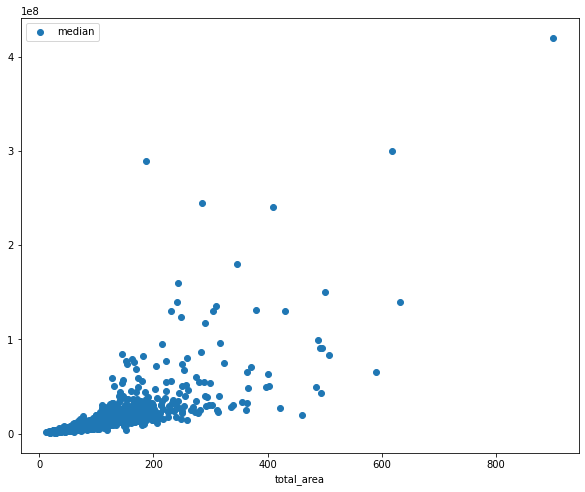

In [50]:
pivot_total_area = df.pivot_table(index = 'total_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [51]:
df['last_price'].corr(df['total_area'])

0.7118257964562302

**Вывод:** Согластно корреляции Пирсона коэфициент 0.65 (сила корреляционной связи является средней) Чем больше общая площадь, тем выше стоимость квартиры.

**Зависит ли цена от жилой площади**

<AxesSubplot:xlabel='living_area'>

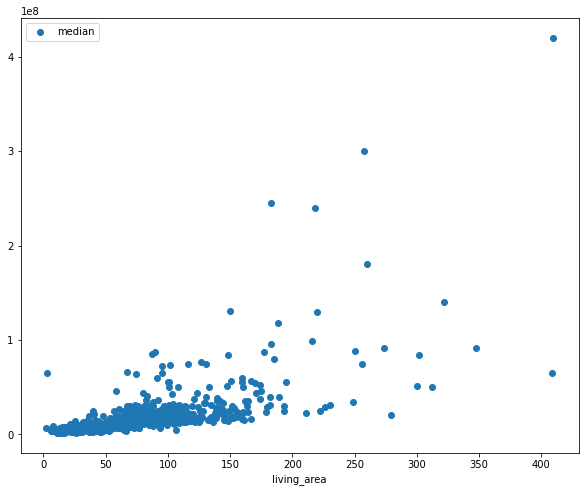

In [52]:
pivot_total_area = df.pivot_table(index = 'living_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [53]:
df['last_price'].corr(df['living_area'])

0.6124161648389128

**Вывод:** Согластно корреляции Пирсона коэфициент 0.56(сила корреляционной связи является средней) Чем больше жилая  площадь, тем выше стоимость квартиры.

**Зависит ли цена от площади кухни**

<AxesSubplot:xlabel='kitchen_area'>

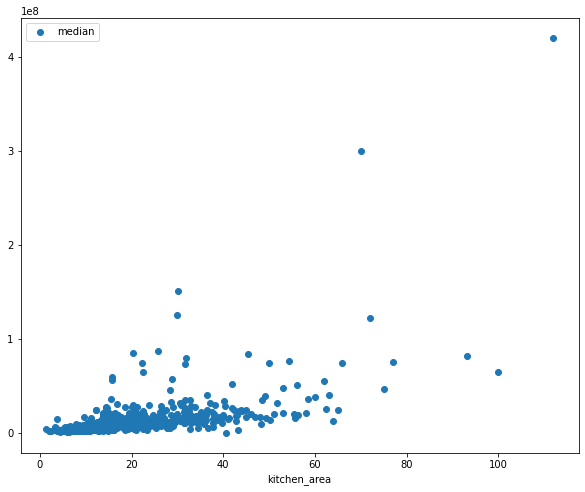

In [54]:
pivot_total_area = df.pivot_table(index = 'kitchen_area', values = 'last_price', aggfunc = ['mean', 'count', 'median'])
pivot_total_area.columns = ['mean', 'count', 'median']
pivot_total_area.plot(y = 'median', style = 'o', figsize=(10,8))

In [55]:
df['last_price'].corr(df['kitchen_area'])

0.5338239265762236

**Вывод:** Согластно корреляции Пирсона коэфициент 0.51(сила корреляционной связи является средней) Чем больше площадь кухни, тем выше стоимость квартиры.

**Зависимость полной цены от количества комнат.**

(0.0, 70000000.0)

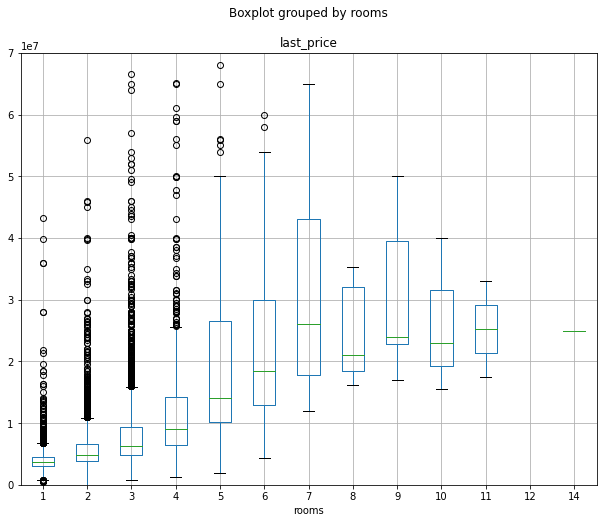

In [56]:
df_filtered = df[df['rooms']<=14]
df_filtered.boxplot('last_price', by='rooms',figsize=(10,8)).set_ylim(0,70000000)

In [57]:
df['rooms'].corr(df['last_price'])

0.40285965809999236

**Вывод:** Полная цена зависит от количества комнат. Так как сила корреляционной связи, является средней согластно методу Пирсона.

<div class="alert alert-info">
    График нам четко показывает что в зависимости от количества комнат цена растет. Четкая тенденция до 7 комнат, выше 7 комнат график колеблется.Но то что цена вырастает от числа комнат, видно. 

**Зависимость полной цены от этажа**


(0.0, 20000000.0)

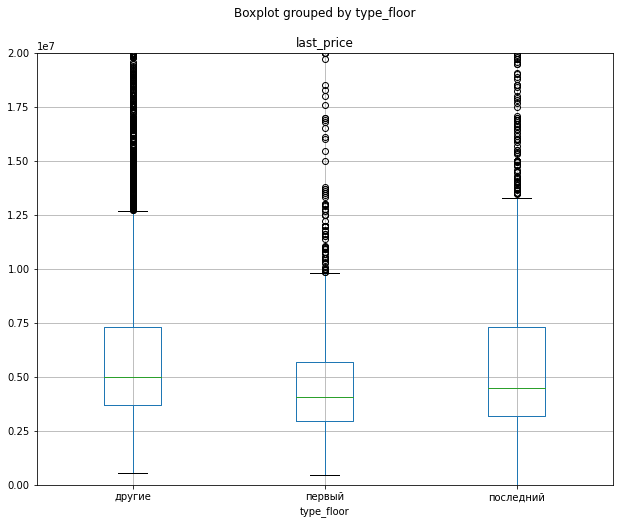

In [58]:
df.boxplot('last_price', by='type_floor',figsize=(10,8)).set_ylim(0,20000000)

(0.0, 20000000.0)

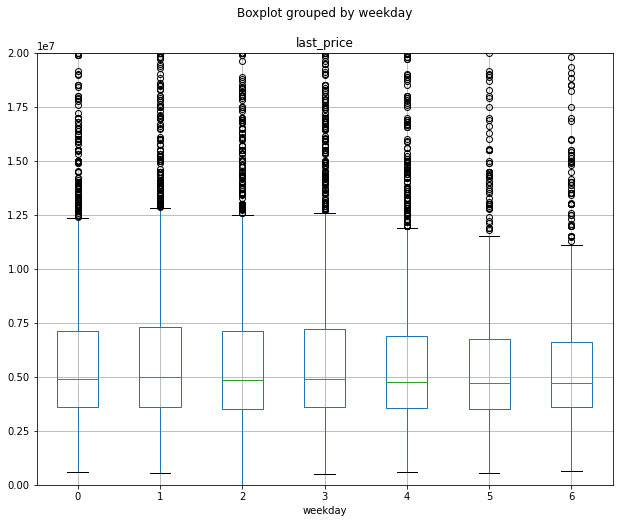

In [59]:
df.boxplot('last_price', by='weekday',figsize=(10,8)).set_ylim(0,20000000)

In [60]:
df['weekday'].corr(df['last_price'])

-0.015754530528140635

**Вывод:** никакой корреляции между днем недели публикации объявления и ценой нет.

(0.0, 15000000.0)

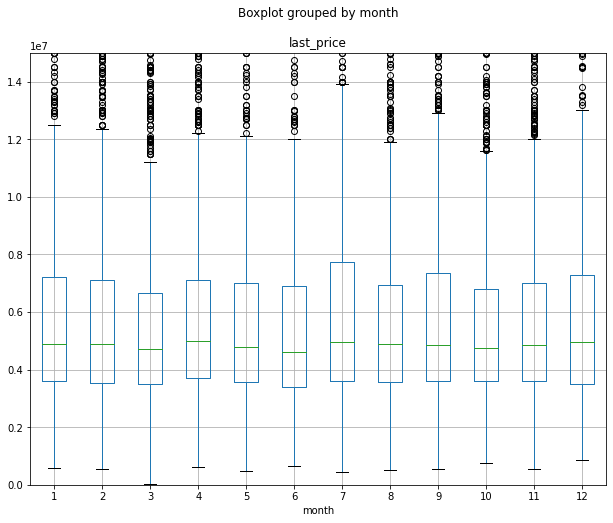

In [61]:
df.boxplot('last_price', by='month',figsize=(10,8)).set_ylim(0,15000000)

In [62]:
df['month'].corr(df['last_price'])

0.0035162529116772455

**Вывод:** И месяц публикации никак на конечную цену не влияет.

(0.0, 30000000.0)

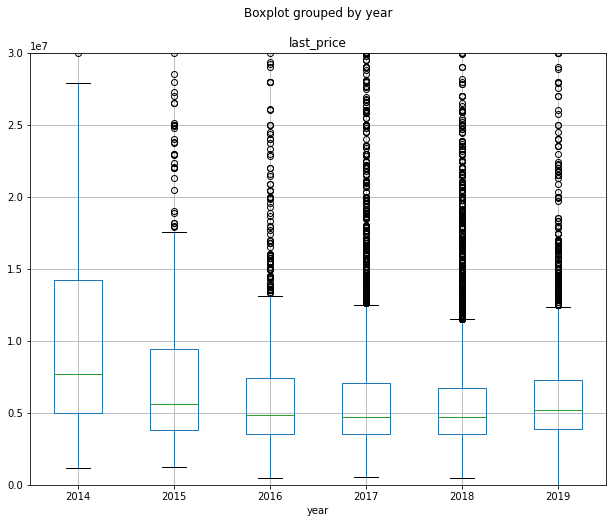

In [63]:
df.boxplot('last_price', by='year',figsize=(10,8)).set_ylim(0,30000000)

**Вывод:** Согластно графика, самые дорогие квартиры были в 2014 году, потом началось снижение цены до 2017 года и совсем не большой рост в 2019. Что в принципе отражает что происходило в стране. До 2014 года самые тучные годы, а там Крым Наш , санкции, падение доходов не уверенность в завтра. Так думаю я смотря на график, возможно это и не так можно не соглашатся.

#### Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. 
* Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. 
* Эти данные можно найти по имени в столбце locality_name.

In [64]:
top_10_locations = df['locality_name'].value_counts().head(10)

for location in top_10_locations.index:
    location_data = df[df['locality_name'] == location]
    avg_price_per_sqm = location_data['last_price'].sum() / location_data['total_area'].sum()
    print(f"{location}: {round(avg_price_per_sqm)}")


Санкт-Петербург: 124347
Всеволожск: 66787
Пушкин: 107184
Мурино: 84935
Шушары: 76766
Колпино: 74143
Кудрово: 94304
Гатчина: 69923
Петергоф: 86872
Парголово: 88325


#### Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

In [65]:
st_petersburg_df = df[df['locality_name'] == 'Санкт-Петербург']
st_petersburg_df = st_petersburg_df.groupby('distance_city_center')['last_price'].mean()
st_petersburg_df.round()

distance_city_center
0.0     22826611.0
1.0     22077548.0
2.0     17513685.0
3.0     11234244.0
4.0     12836774.0
5.0     14288125.0
6.0     15625268.0
7.0     14583196.0
8.0     10693072.0
9.0      7406132.0
10.0     6879417.0
11.0     6366429.0
12.0     5990715.0
13.0     6196063.0
14.0     5632654.0
15.0     5961147.0
16.0     5426578.0
17.0     5382512.0
18.0     4894926.0
19.0     4987383.0
20.0     5456400.0
21.0     5809508.0
22.0     5464979.0
23.0     5138915.0
24.0     4648000.0
25.0     4267500.0
26.0     4162600.0
27.0    14350000.0
28.0     7600000.0
29.0     4114000.0
Name: last_price, dtype: float64

<AxesSubplot:xlabel='distance_city_center'>

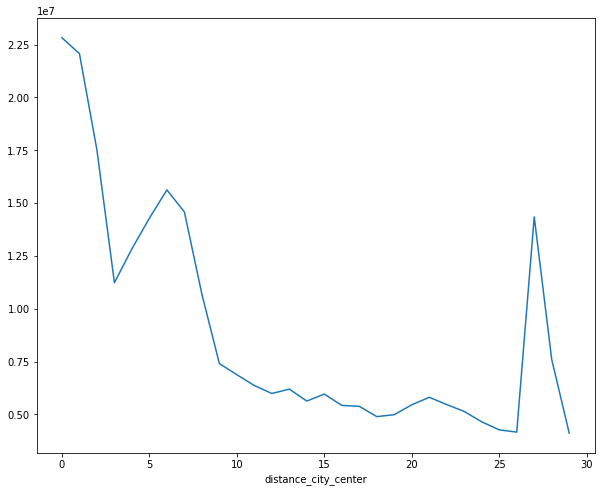

In [66]:
st_petersburg_df.plot(figsize=(10,8))

Общая зависимость стоимости от расстояния до центра : чем дальше квартира от центра города, тем дешевле она стоит. Но также может быть и исключения в зависимости от всех факторов указанных выше, количество комнат, общая площадь и т.д.Здесь вероятно еще играет район расположения квартиры на цену, возможно какие-то друие фактры.( 12км от центра 

# 6. Общий вывод.


*   Общая стоимость квартиры в Петербурге и окресностях, зависит.

1.   От общей площади квартиры.
2.   От жилой площади квартиры.
3.   От площади кухни.
4.   От количества комнат.
5.   Удаленность от центра тоже вносит свои корректировки в образовании конечной цены.


*   Самое большое предложение продаж по городу Санкт-Петербургу, так же и самая высокая цена квадратного метра. Так же в  топ 10 по цене квадрата, входят Мурино,Шушары, Выборг замыкает топ.



* Рекомендации возможно ввести ограничения на ввод данных о высоте потолков: допущено множество  ошибок (27 м вместо 2,7 м, потолки менее 2 м и т.д.).
* Обязательное поле для заполнения количество балконов, названий локации продажи(указать город и т.д), полe количество комнат не может быть 0.